خطوات إنشاء شبكة عصبية باستخدام TensorFlow

أ. استيراد المكتبة وتحميل البيانات

____________________________________________________________________
TensorFlow  قمت باستخدام بيانات مضمنة في مكتبة  
لأن المكتبة تحتوي على بيانات معالجة وجاهزة للإستخدام في الشبكات العصبية ونماذج التعلم 
فقط من أجل التركيز على موضوع التدريب 

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

# تحميل بيانات MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
# إعادة تشكيل البيانات وتطبيعها
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# تحويل التصنيفات إلى صيغة الفئات (One-Hot Encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape)
print((28*28)*60000)

(60000, 28, 28)
(60000, 28, 28, 1)
47040000


ب. بناء نموذج الشبكة العصبية

In [2]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore

# إنشاء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # طبقة التفاف
    MaxPooling2D((2, 2)),                                            # طبقة تجميع
    Flatten(),                                                      # تحويل البيانات إلى صيغة مسطحة
    Dense(128, activation='relu'),                                  # طبقة كاملة الاتصال
    Dense(10, activation='softmax')                                 # طبقة الإخراج
])


C:\Users\Abo Khalid\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ج. إعداد النموذج (اختيار المحسّن ودالة الفقد)
python
Copy code


In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


د. تدريب النموذج

In [4]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9046 - loss: 0.3222 - val_accuracy: 0.9822 - val_loss: 0.0646
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9819 - loss: 0.0582 - val_accuracy: 0.9818 - val_loss: 0.0631
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9815 - val_loss: 0.0617
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9847 - val_loss: 0.0556
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9862 - val_loss: 0.0539
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9849 - val_loss: 0.0657
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9964 - loss: 0.0094 - val_accuracy: 0.9855 - val_loss: 0.0626
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9979 - los

هـ. تقييم النموذج

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0621
Test accuracy: 0.99


حفظ النموذج 

يتم حفظ النموذج في ملف بامتداد

 .h5، 

 وهو صيغة معتمدة لحفظ نماذج 
 
 TensorFlow.

In [44]:
# حفظ النموذج
model.save("mnist_model.h5")

إعادة تحميل النموذج:
لاستخدام النموذج المحفوظ، يتم تحميله باستخدام 

tf.keras.models.load_model().

In [45]:
from tensorflow.keras.models import load_model # type: ignore

# تحميل النموذج المحفوظ
model = load_model("mnist_model.h5")


أكواد إضافية

لمعرفة طبيعة البيانات ومعلومات بيانات التدريب والاختبار 

In [7]:
training_set_size =(x_train.shape[0],y_train.shape[0])
test_set_size = (x_test.shape[0],y_test.shape[0])

print(f"Training set size: {training_set_size}")

Training set size: (60000, 60000)


In [8]:
testing_set_size =(x_test.shape[0],y_test.shape[0])
print(f"Testing Set Size =",testing_set_size)


Testing Set Size = (10000, 10000)


In [42]:
import sys
tensor = x_train[0][22][1]
tf.print(tensor, output_stream=sys.stderr)

array([0.], dtype=float32)


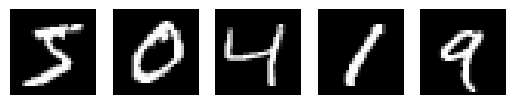

In [47]:
import matplotlib.pyplot as plt

# عرض أول 5 صور
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")  # استخدام cmap للصور الرمادية
    plt.axis("off")

plt.show()


In [ ]:
import cv2
import numpy as np

# افترض أن x_train يحتوي على بيانات الصور بالأبيض والأسود (MNIST على سبيل المثال)
# عرض أبعاد الصورة للتأكد من شكلها
print(x_train[0].shape)

# اختيار الصورة لعرضها
image = x_train[2]

# التأكد من أن الصورة في نطاق ألوان صحيح (0-255)
# إذا كانت الصورة في نطاق [0, 1]، يتم ضربها بـ 255
if np.max(image) <= 1:
    image = (image * 255).astype(np.uint8)

# عرض الصورة باستخدام OpenCV
cv2.imshow("Image", image)
cv2.waitKey(0)  # انتظر حتى يتم الضغط على أي مفتاح
cv2.destroyAllWindows()  # أغلق نافذة العرض


In [48]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore

# Initialize the CNN
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

C:\Users\Abo Khalid\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# class Model:
#     def __init__(self):  
#         super().__init__()
    
#     def predict(self, name):
#         print("Tired 😪 ") 

# model = Model()


# model.predict("sharaf")


Tired 😪 
